In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [3]:
def unscale_params(scaled_params, scale_factors):
    return scaled_params * scale_factors

In [4]:
scale_factors = np.array([1e-2, 1e-9, 1])

In [5]:
target = 'D1'
method = 'nelder-mead'

root_directory = f'../optimization_data/{target}_{method}/'
unzip_directory = f'../opt_test_unzipped/{target}_{method}/'
print(root_directory)
print(unzip_directory)
#unzip_data_npz(root_directory, unzip_directory)

../optimization_data/D1_nelder-mead/
../opt_test_unzipped/D1_nelder-mead/


In [6]:
path = os.path.join('../', root_directory, 'data/')

rb_paths = [item for item in os.listdir(path) if item.startswith('rb_ondevice') 
            and os.path.isdir(os.path.join(path, item))]
sorted_rb_items = sorted(rb_paths, key=lambda x: int(x.split('-')[1]))
print(len(sorted_rb_items))

175


In [7]:
loaded = np.load('optimization_history.npz')
iterations = loaded['iterations']
parameters = loaded['parameters']
objective_values = loaded['objective_values']
#objective_values_error = loaded['objective_value_error']

In [8]:
unscaled_parameters = np.array(unscale_params(parameters, scale_factors))


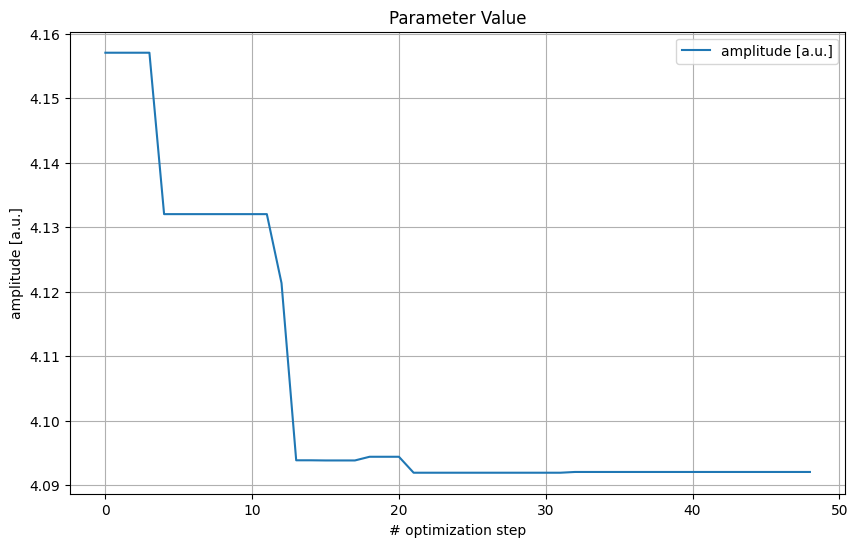

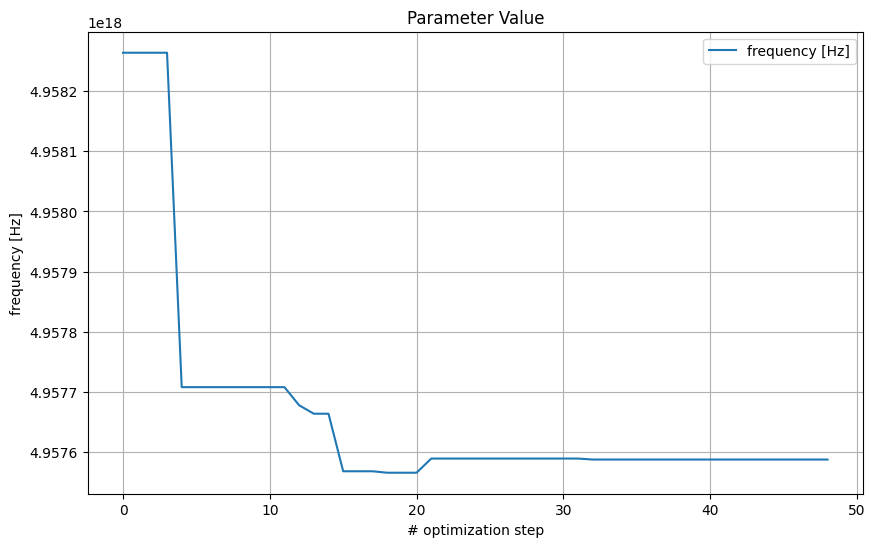

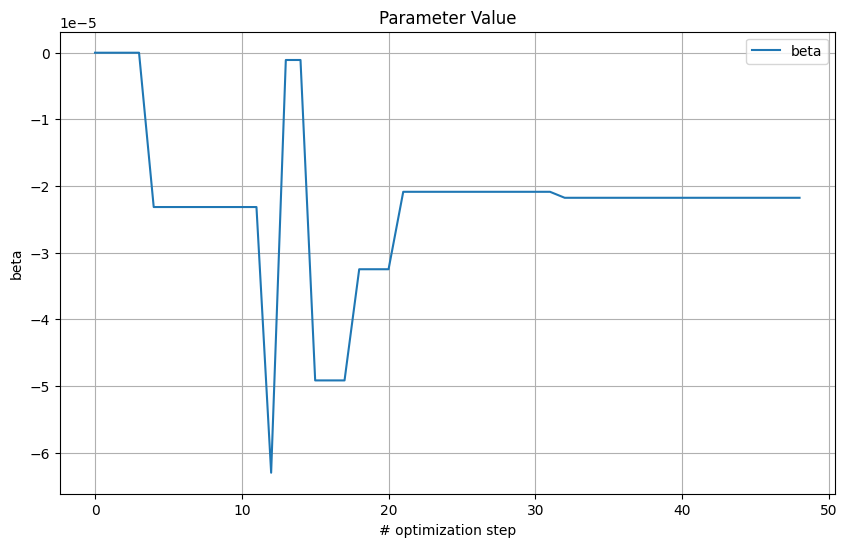

In [9]:
params_name = ['amplitude [a.u.]', 'frequency [Hz]', 'beta']

for i in range(unscaled_parameters.shape[1]):
    plt.figure(figsize=(10, 6))  # Create a new figure for each parameter
    plt.plot(iterations, parameters[:, i], label=f'{params_name[i]}')
    plt.xlabel('# optimization step')
    plt.ylabel(f'{params_name[i]}')
    plt.title('Parameter Value')
    plt.legend()
    plt.grid()
    plt.show()